<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2022/3

### CS6462 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
March 7th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">Sajin Mohamed Pallikkathodi Erathali</span>
### Student Surname: <span style="color:red">Pallikkathodi Erathali</span>
### Student ID: <span style="color:red">23037601</span>
### Date of Final Submission: <span style="color:red">TODO: put the date when you submitted for grading</span>
***

## Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures.
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity.

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

<span style="color:red">The grade of the student depends on : 1
intelligence which can assume values like (low or high),   
module_difficulty (easy, hard),  
health_status (sick or healthy), where each of these events are independent of each other.  
and 2. Forum activity which can take values (no_activity, activity)  

These events (grades, forum) are also independent of each other.

However the letter variable(the possibility of getting a strong recommendation letter vs. weak recommendation letter) depends on the grades and forum values

These dependencies can be represented as  
intelligence ⊥ module_difficulty (independent)  
module_difficulty ⊥ health_status (independent)  
forum ⊥ grade (independent)
</span>

In [32]:
!pip install pgmpy

### Step 1.2. Draw and show the DAG (7%)

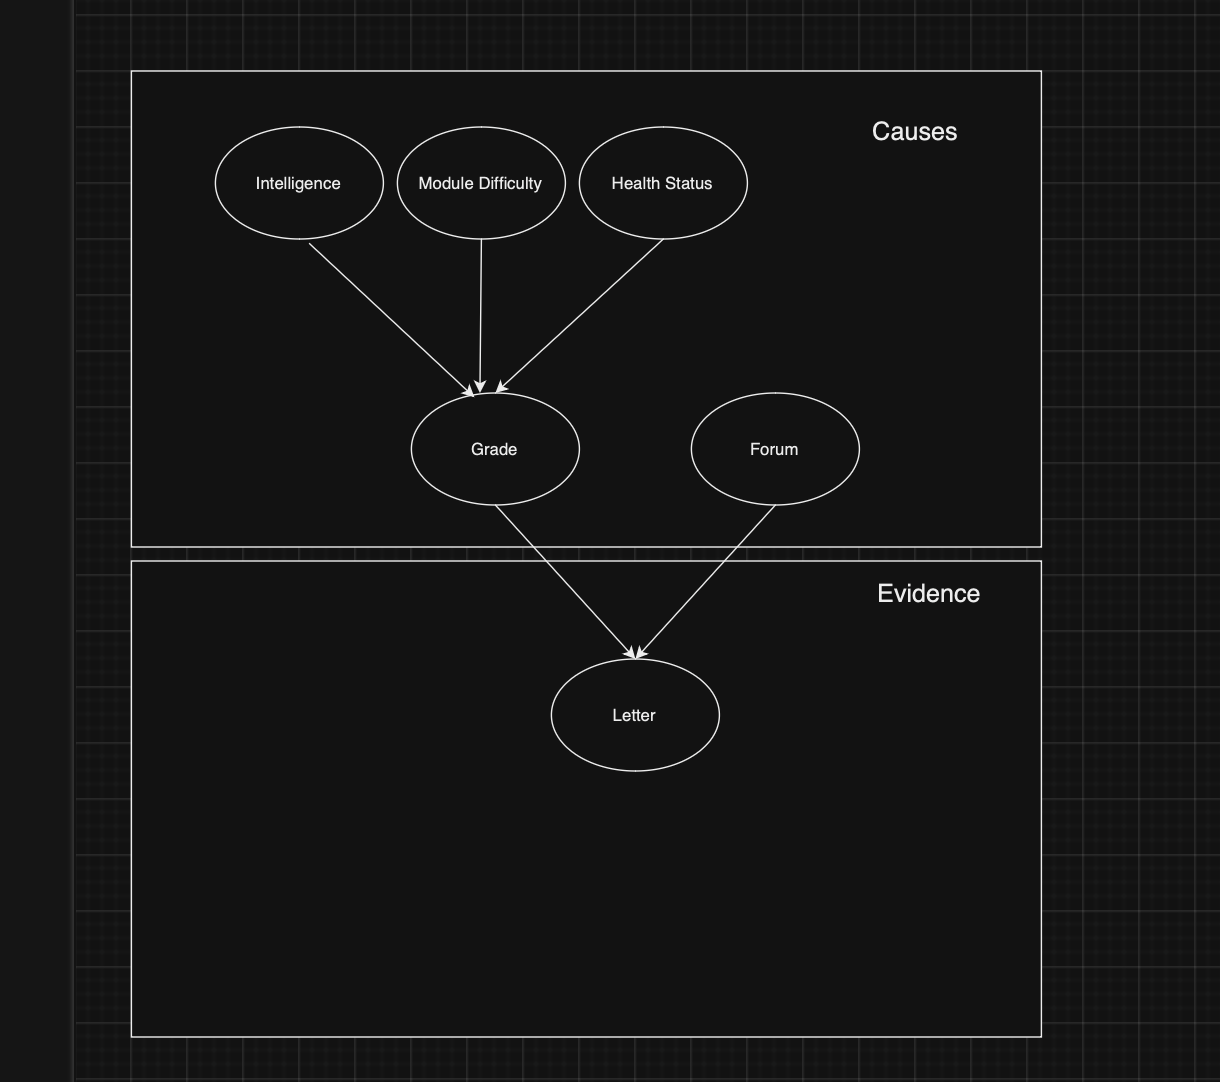

In [86]:
from IPython.display import Image

Image("/content/Probabilistic.png")

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

<span style="color:red">Consider the Bayesian Network represented below, where we have 6 nodes each having 2 states except the Grade.  
Grade :  
  <pre>
  intelligence: domain: {low, high}  
  module_difficulty: {easy, hard}  
  health_status: {sick or healthy}
  </pre>  
Forum : {not_active, active}  
Letter : {strong, weak}.
Additional constraints:
  <pre>
  intelligence ⊥ module_difficulty (independent)
  module_difficulty ⊥ health_status (independent)
  Forum ⊥ Grade (independent)
  </pre>
</span>

In [34]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

model = BayesianNetwork([("intelligence", "grade"), ("module_difficulty", "grade"), ("health_status", "grade"), ("grade", "letter"), ("forum", "letter")])


### Step 1.4. Show the DAG of the Bayesian Network (1%)

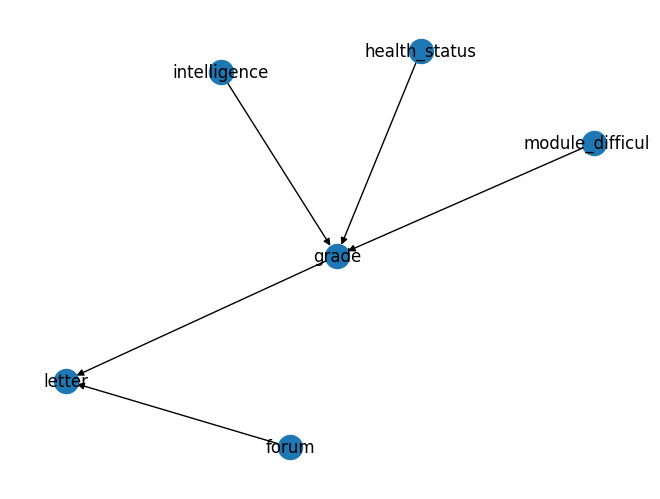

In [91]:


# Extract edges from model
edges = model.edges()

# Create a directed graph from the edges
G = nx.DiGraph()
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()
plt.close()


## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

P(intelligence=low) = 0.7  
P(intelligence=high) = 0.3  
P(module_difficulty=easy) = 0.7  
P(module_difficulty=hard) = 0.3  
P(health_status=sick) = 0.2  
P(health_status=healthy) = 0.8  
P(Grades=A) = 0.1  
P(Grades=B) = 0.5  
P(Grades=C) = 0.4  
P(Grades=A | Intelligence=high ∩ Module_difficulty=easy ∩ Health_status=sick) = 0.2  
P(Grades=B | Intelligence=high ∩ Module_difficulty=easy ∩ Health_status=sick) = 0.3  
P(Grades=C | Intelligence=high ∩ Module_difficulty=easy ∩ Health_status=sick) = 0.5  

P(Grades=A | Intelligence=high ∩ Module_difficulty=hard ∩ Health_status=sick) = 0.05  
P(Grades=B | Intelligence=high ∩ Module_difficulty=hard ∩ Health_status=sick) = 0.25  
P(Grades=C | Intelligence=high ∩ Module_difficulty=hard ∩ Health_status=sick) = 0.7  

P(Grades=A | Intelligence=high ∩ Module_difficulty=easy ∩ Health_status=healthy) = 0.7  
P(Grades=B | Intelligence=high ∩ Module_difficulty=easy ∩ Health_status=healthy) = 0.2  
P(Grades=C | Intelligence=high ∩ Module_difficulty=easy ∩ Health_status=healthy) = 0.1  

P(Grades=A | Intelligence=high ∩ Module_difficulty=hard ∩ Health_status=healthy) = 0.3  
P(Grades=B | Intelligence=high ∩ Module_difficulty=hard ∩ Health_status=healthy) = 0.6  
P(Grades=C | Intelligence=high ∩ Module_difficulty=hard ∩ Health_status=healthy) = 0.1  

P(Grades=A | Intelligence=low ∩ Module_difficulty=hard ∩ Health_status=healthy) = 0.03  
P(Grades=B | Intelligence=low ∩ Module_difficulty=hard ∩ Health_status=healthy) = 0.1  
P(Grades=C | Intelligence=low ∩ Module_difficulty=hard ∩ Health_status=healthy) = 0.87  

P(Grades=A | Intelligence=low ∩ Module_difficulty=easy ∩ Health_status=healthy) = 0.1  
P(Grades=B | Intelligence=low ∩ Module_difficulty=easy ∩ Health_status=healthy) = 0.5  
P(Grades=C | Intelligence=low ∩ Module_difficulty=easy ∩ Health_status=healthy) = 0.4  

P(Grades=A | Intelligence=low ∩ Module_difficulty=easy ∩ Health_status=sick) = 0.06  
P(Grades=B | Intelligence=low ∩ Module_difficulty=easy ∩ Health_status=sick) = 0.67  
P(Grades=C | Intelligence=low ∩ Module_difficulty=easy ∩ Health_status=sick) = 0.27  

P(Grades=A | Intelligence=low ∩ Module_difficulty=hard ∩ Health_status=sick) = 0.001  
P(Grades=B | Intelligence=low ∩ Module_difficulty=hard ∩ Health_status=sick) = 0.3  
P(Grades=C | Intelligence=low ∩ Module_difficulty=hard ∩ Health_status=sick) = 0.699  

P(forum=not_active) = 0.2  
P(forum=Active) = 0.8  

P(letter=Strong | grade=A ∩ forum=not_active) = 0.8  
P(letter=Strong | grade=A ∩ forum=active) = 0.9   
P(letter=Strong | grade=B ∩ forum=not_active) = 0.6  
P(letter=Strong | grade=B ∩ forum=active) = 0.7  
P(letter=Strong | grade=C ∩ forum=not_active) = 0.5  
P(letter=Strong | grade=C ∩ forum=active) = 0.6  

P(letter=Weak | grade=A ∩ forum=not_active) = 0.2  
P(letter=Weak | grade=A ∩ forum=active) = 0.1  
P(letter=Weak | grade=B ∩ forum=not_active) = 0.4  
P(letter=Weak | grade=B ∩ forum=active) = 0.3  
P(letter=Weak | grade=C ∩ forum=not_active) = 0.5  
P(letter=Weak | grade=C ∩ forum=active) = 0.4  


In [70]:
# your code goes here
# Conditional Probability Distributions (CPDs)

# define CPD for Intelligence
#
# the TabularCPD class associates the ditribution model to be constructed with a random variable,
# e.g., Intelligence
cpd_intelligence = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="intelligence",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {low, high}
    variable_card=2,

    # define the distribution table
    # values are ordered following the domain {low, high}
    # e.g., P (cpd_intelligence=low) = 0.7; P (cpd_intelligence=high) = 0.73
    values=[[0.7], [0.3]]
)


# define CPD for module_difficulty
#
# the TabularCPD class associates the ditribution model to be constructed with a random variable,
# e.g., Intelligence
cpd_module_difficulty = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="module_difficulty",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {easy, hard}
    variable_card=2,

    # define the distribution table
    # values are ordered following the domain {easy, hard}
    # e.g., P (cpd_module_difficulty=easy) = 0.7; P (cpd_module_difficulty=hard) = 0.3
    values=[[0.7], [0.3]]
)

# define CPD for health_status
#
# the TabularCPD class associates the ditribution model to be constructed with a random variable,
# e.g., health_status
cpd_health_status = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="health_status",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {sick, healthy}
    variable_card=2,

    # define the distribution table
    # values are ordered following the domain {sick, healthy}
    # e.g., P (cpd_health_status=sick) = 0.2; P (cpd_health_status=healthy) = 0.8
    values=[[0.2], [0.8]]
)

cpd_grade = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="grade",

    # define the cardinality of the variable domain, i.e., binary = 3 -> domain = {A, B, C}
    variable_card=3,

    # define the distribution table
    # values are ordered following the domain {A, B, C}
    # e.g., P (cpd_grade=A) = 0.1; P (cpd_grade=B) = 0.5; P (cpd_grade=C) = 0.4
    # C=yes = {[A=yes,B=yes],[A=yes,B=no],[A=no,B=yes],[A=no,B=no]} = {1, 1, 0.5, 0}
    # C=no = {[A=yes,B=yes],[A=yes,B=no],[A=no,B=yes],[A=no,B=no]} = {0, 0, 0.5, 1]}
    # C=yes + C=no = 1
    # grade = A
    #   {
    #   [intelligence=high, module_difficulty=easy, health_status=sick],
    #   [intelligence=high ∩ module_difficulty=hard ∩ health_status=sick],
    #   [intelligence=high ∩ module_difficulty=easy ∩ health_status=healthy],
    #   [intelligence=high ∩ module_difficulty=hard ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=hard ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=easy ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=easy ∩ health_status=sick],
    #   [intelligence=low ∩ module_difficulty=hard ∩ health_status=sick]
    #   }
    # # grade = B
    #   {
    #   [intelligence=high, module_difficulty=easy, health_status=sick],
    #   [intelligence=high ∩ module_difficulty=hard ∩ health_status=sick],
    #   [intelligence=high ∩ module_difficulty=easy ∩ health_status=healthy],
    #   [intelligence=high ∩ module_difficulty=hard ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=hard ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=easy ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=easy ∩ health_status=sick],
    #   [intelligence=low ∩ module_difficulty=hard ∩ health_status=sick]
    #   }
    # grade = C
    #   {
    #   [intelligence=high, module_difficulty=easy, health_status=sick],
    #   [intelligence=high ∩ module_difficulty=hard ∩ health_status=sick],
    #   [intelligence=high ∩ module_difficulty=easy ∩ health_status=healthy],
    #   [intelligence=high ∩ module_difficulty=hard ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=hard ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=easy ∩ health_status=healthy],
    #   [intelligence=low ∩ module_difficulty=easy ∩ health_status=sick],
    #   [intelligence=low ∩ module_difficulty=hard ∩ health_status=sick]
    #   }
    values=[[0.2, 0.05, 0.7, 0.3, 0.03, 0.1, 0.06, 0.001],
            [0.3, 0.25, 0.29, 0.6, 0.1, 0.5, 0.67, 0.3],
            [0.5, 0.7, 0.01, 0.1, 0.87, 0.4, 0.27, 0.699]],
    evidence=["intelligence", "module_difficulty", "health_status"],
    evidence_card=[2,2,2]
)

cpd_forum = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="forum",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {not_active, active}
    variable_card=2,

    # define the distribution table
    # values are ordered following the domain {not_active, active}
    # e.g., P (cpd_forum=note_active) = 0.2; P (cpd_forum=active) = 0.8
    values=[[0.2], [0.8]]
)

cpd_letter = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="letter",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {weak, strong}
    variable_card=2,

    # define the distribution table
    # values are ordered following the domain {weak, strong}
    # e.g., P (cpd_letter=weak) = 0.2; P (cpd_letter=strong) = 0.8
    # letter=strong
    # {[grade=A, forum=not_active], [grade=A, forum=active],
    # [grade=B, forum=not_active], [grade=B, forum=active],
    # [grade=C, forum=not_active], [grade=C, forum=active]}
    # letter=weak
    # {[grade=A, forum=not_active], [grade=A, forum=active],
    # [grade=B, forum=not_active], [grade=B, forum=active],
    # [grade=C, forum=not_active], [grade=C, forum=active]}
    values=[[0.8, 0.9, 0.6, 0.7, 0.5, 0.6],
            [0.2, 0.1, 0.4, 0.3, 0.5, 0.4]],
    evidence=["grade", "forum"],
    evidence_card=[3,2]
)


In [71]:
print(model.nodes())

['intelligence', 'grade', 'module_difficulty', 'health_status', 'letter', 'forum']


### Step 2.2: Associate the distribution models with the network structure (2%)

In [72]:
# your code goes here
model.add_cpds(cpd_intelligence, cpd_module_difficulty, cpd_health_status, cpd_grade, cpd_forum, cpd_letter)

### Step 2.3: Check the model (2%)

In [73]:
for cpd in model.get_cpds():
    print(cpd)

+-----------------+-----+
| intelligence(0) | 0.7 |
+-----------------+-----+
| intelligence(1) | 0.3 |
+-----------------+-----+
+----------------------+-----+
| module_difficulty(0) | 0.7 |
+----------------------+-----+
| module_difficulty(1) | 0.3 |
+----------------------+-----+
+------------------+-----+
| health_status(0) | 0.2 |
+------------------+-----+
| health_status(1) | 0.8 |
+------------------+-----+
+-------------------+----------------------+-----+----------------------+
| intelligence      | intelligence(0)      | ... | intelligence(1)      |
+-------------------+----------------------+-----+----------------------+
| module_difficulty | module_difficulty(0) | ... | module_difficulty(1) |
+-------------------+----------------------+-----+----------------------+
| health_status     | health_status(0)     | ... | health_status(1)     |
+-------------------+----------------------+-----+----------------------+
| grade(0)          | 0.2                  | ... | 0.001      

In [74]:
# your code goes here
model.check_model()

True

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [75]:
# your code goes here
from pgmpy.inference import VariableElimination

infer = VariableElimination(model) # to run inference

As per Bayes' Theorem

<pre>

                            P(Evidence|Cause) * P(Cause)
   P(Cause|Evidence) = ---------------------------------------
		                         P(Evidence)
                             

</pre>



In [85]:
# show the posterior probability results
# your code goes here
posterior_probability_A_strong_recommendation = infer.query(["grade"], evidence={"letter":0})
print(posterior_probability_A_strong_recommendation)

+----------+--------------+
| grade    |   phi(grade) |
+==========+==============+
| grade(0) |       0.1849 |
+----------+--------------+
| grade(1) |       0.3745 |
+----------+--------------+
| grade(2) |       0.4405 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [78]:
# your code goes here
posterior_probability_with_no_evidence = infer.query(["letter"], evidence={})

In [79]:
# show the prior probability results
# your code goes here
print(posterior_probability_with_no_evidence)

+-----------+---------------+
| letter    |   phi(letter) |
+===========+===============+
| letter(0) |        0.6577 |
+-----------+---------------+
| letter(1) |        0.3423 |
+-----------+---------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [80]:
# your code goes here
prior_probability_strong_letter_with_no_activity = infer.query(["letter"], evidence = {"forum":0})

In [81]:
# show the prior probability results
# your code goes here
print(prior_probability_strong_letter_with_no_activity)

+-----------+---------------+
| letter    |   phi(letter) |
+===========+===============+
| letter(0) |        0.5777 |
+-----------+---------------+
| letter(1) |        0.4223 |
+-----------+---------------+
